In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"
# Read the City and Ride Data
city_data_to_load_df = pd.read_csv(city_data_to_load)
ride_data_to_load_df = pd.read_csv(ride_data_to_load)
city_data_to_load_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [2]:
# Combine the data into a single dataset
combined_data_df = pd.merge(ride_data_to_load_df, city_data_to_load_df,how='left', on='city')
combined_data_df.head()
# Display the data table for preview

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [3]:
# Average fare calcul
type_data = combined_data_df["type"]
type_data = combined_data_df["type"].value_counts()
fares_group = combined_data_df.groupby('city')
fares_per_city = fares_group['fare'].sum()
rides_group = combined_data_df.groupby('city')
rides_per_city = rides_group['city'].count()
average_fare = fares_per_city / rides_per_city
merge_table = pd.DataFrame({'Rides':rides_per_city, 'Average Fares':average_fare, 'Fares':fares_per_city})
merge_table.head()

,Rides,Average Fares,Fares
city,,,
Amandaburgh,18,24.641667,443.55
Barajasview,22,25.332273,557.31
Barronchester,16,36.422500,582.76
Bethanyland,18,32.956111,593.21
Bradshawfurt,10,40.064000,400.64


In [4]:
type_urban = combined_data_df[combined_data_df["type"] == "Urban"].groupby([combined_data_df["city"]])
type_rural = combined_data_df[combined_data_df["type"] == "Rural"].groupby([combined_data_df["city"]])
type_suburbs = combined_data_df[combined_data_df["type"] == "Suburban"].groupby([combined_data_df["city"]])
# Obtain the x and y coordinates for each of the three city types
x_u = type_urban["ride_id"].count()
y_u = type_urban["fare"].mean()

x_r = type_rural["ride_id"].count()
y_r = type_rural["fare"].mean()

x_s = type_suburbs["ride_id"].count()
y_s = type_suburbs["fare"].mean()

# size of circles for graph
s_u = type_urban["driver_count"].mean()
s_r = type_rural["driver_count"].mean()
s_s = type_suburbs["driver_count"].mean()

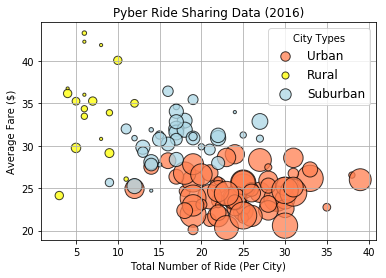

In [5]:
# Build the scatter plots for each city types
plt.scatter(x_u, y_u, marker="o", label = "Urban", facecolors="coral", edgecolors="black",
            s=s_u * 10, alpha=0.75)
plt.scatter(x_r, y_r, marker="o",label = "Rural", facecolors="yellow", edgecolors="black",
            s=s_r * 10, alpha=0.75)
plt.scatter(x_s, y_s, marker="o", label = "Suburban",facecolors="lightblue", edgecolors="black",
            s=s_s * 10, alpha=0.75)
# Adding the other graph properties & Create a legend
plt.grid()

plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Ride (Per City)")
#combined_data_df.plot(grid=True)
# Incorporate a text label regarding circle size
#color_label = ["red", "light blue", "yellow"]
#legend = ["Urban", "Suburban", "Rural"]
legend = plt.legend(fontsize = 12, title= "City Types", loc="best")
legend.legendHandles[0]._sizes = [90]
# Save Figure
plt.savefig("type_of_fare1.png")
plt.show()


## Total Fares by City Type

In [6]:
# Calculate Type Percents
type_city = combined_data_df.groupby(["type"])
total_grouped_city = type_city["fare"].sum()
print(total_grouped_city)

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64


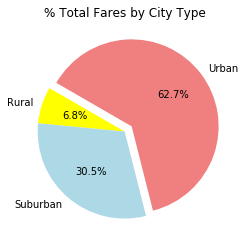

In [7]:
# Build Pie Chart & Labels pie section
labels = ["Rural", "Suburban", "Urban"]
plt.title("% Total Fares by City Type")
#color section of pie
colors = ["yellow", "lightblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.pie(total_grouped_city, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", shadow=False, startangle=150)
# Save Figure
plt.savefig("type_of_fare2.png")
plt.show()

## Total Rides by City Type

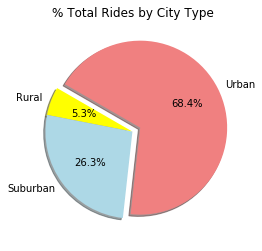

In [8]:
# Calculate Ride Percents
#type_city = combined_data_df.groupby(["type"])
type_city_drivers = city_data_to_load_df.groupby(["type"])
total_rides_city = type_city["ride_id"].count()
# Build Pie Chart
# Build Pie Chart & Labels pie section
labels = ["Rural", "Suburban", "Urban"]
plt.title("% Total Rides by City Type")
#color section of pie
colors = ["yellow", "lightblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.pie(total_rides_city, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
# Labels pie section
labels = ["Rural", "Suburban", "Urban"]
# Save Figure
plt.savefig("type_of_fare3.png")

## Total Drivers by City Type

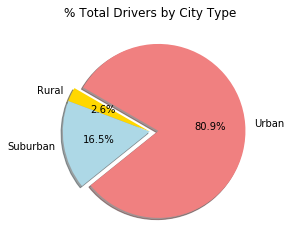

In [9]:
# Calculate Ride Percents
total_drivers_city = type_city_drivers["driver_count"].sum()
# Build Pie Chart
# Build Pie Chart & Labels pie section
labels = ["Rural", "Suburban", "Urban"]
plt.title("% Total Drivers by City Type")
#color section of pie
colors = ["gold", "lightblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.pie(total_drivers_city, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
# Labels pie section
labels = ["Rural", "Suburban", "Urban"]
# Save Figure
plt.savefig("type_of_fare4.png")